<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Convolutional_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining convolutional layers

Step 1: PyTorch setup + visualizer

In [1]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set a seed for reproducibility of random inputs
torch.manual_seed(42)

def visualize_feature_maps(feature_maps_tensor, num_maps_to_show=4, title="Feature Maps"):
    """
    Visualizes a few feature maps from a tensor.

    Args:
        feature_maps_tensor: Tensor of shape (batch_size, num_channels, height, width)
                             or (num_channels, height, width) if batch removed.
        num_maps_to_show: Maximum number of feature maps to display.
        title: Supertitle for the plot.
    """

    # If 4D and batch_size==1, remove batch dimension
    if feature_maps_tensor.ndim == 4 and feature_maps_tensor.shape[0] == 1:
        feature_maps_tensor = feature_maps_tensor.squeeze(0)

    # If not 3D now, fallback to showing first map safely
    if feature_maps_tensor.ndim != 3:
        print(f"Expected a 3D tensor (C,H,W) or 4D (1,C,H,W), but got shape {feature_maps_tensor.shape}")
        try:
            first_map = feature_maps_tensor.detach().cpu().numpy()
            plt.figure(figsize=(3, 3))
            plt.imshow(first_map, cmap="gray")
            plt.title(title + " (Fallback)")
            plt.axis("off")
            plt.show()
        except Exception as e:
            print("Fallback plotting failed:", e)
        return

    num_channels = feature_maps_tensor.shape[0]
    maps_to_display = min(num_channels, num_maps_to_show)

    fig, axes = plt.subplots(1, maps_to_display, figsize=(maps_to_display * 3, 3.5))
    if maps_to_display == 1:
        axes = [axes]

    for i in range(maps_to_display):
        ax = axes[i]
        feature_map = feature_maps_tensor[i].detach().cpu().numpy()
        ax.imshow(feature_map, cmap="gray")
        ax.set_title(f"Channel {i+1}")
        ax.axis("off")

    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


Step 2: Defining convolutional layers in a CNN

In [2]:

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Conv1: 1 input channel (grayscale), 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=0)
        # Conv2: 6 input channels, 16 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0)

    def forward(self, x):
        # Convolution 1 + ReLU
        x = self.conv1(x)
        x = nn.functional.relu(x)

        # Convolution 2 + ReLU
        x = self.conv2(x)
        x = nn.functional.relu(x)
        return x


#Step 3: Visualizing the convolutional process

Input image shape: torch.Size([1, 1, 28, 28])

--- SimpleCNN Processing ---
Shape after SimpleCNN conv1: torch.Size([1, 6, 26, 26])


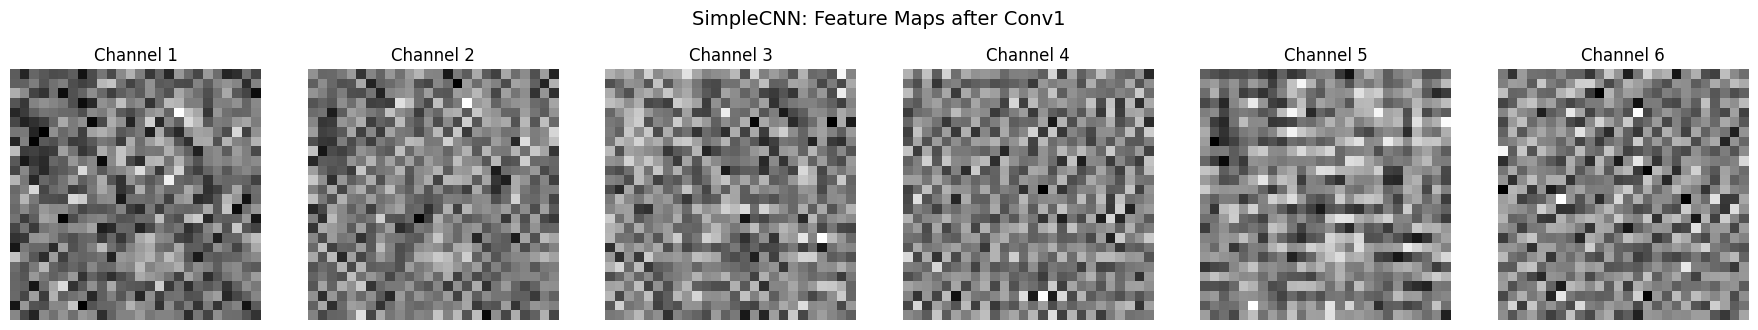

Shape after SimpleCNN conv2: torch.Size([1, 16, 24, 24])


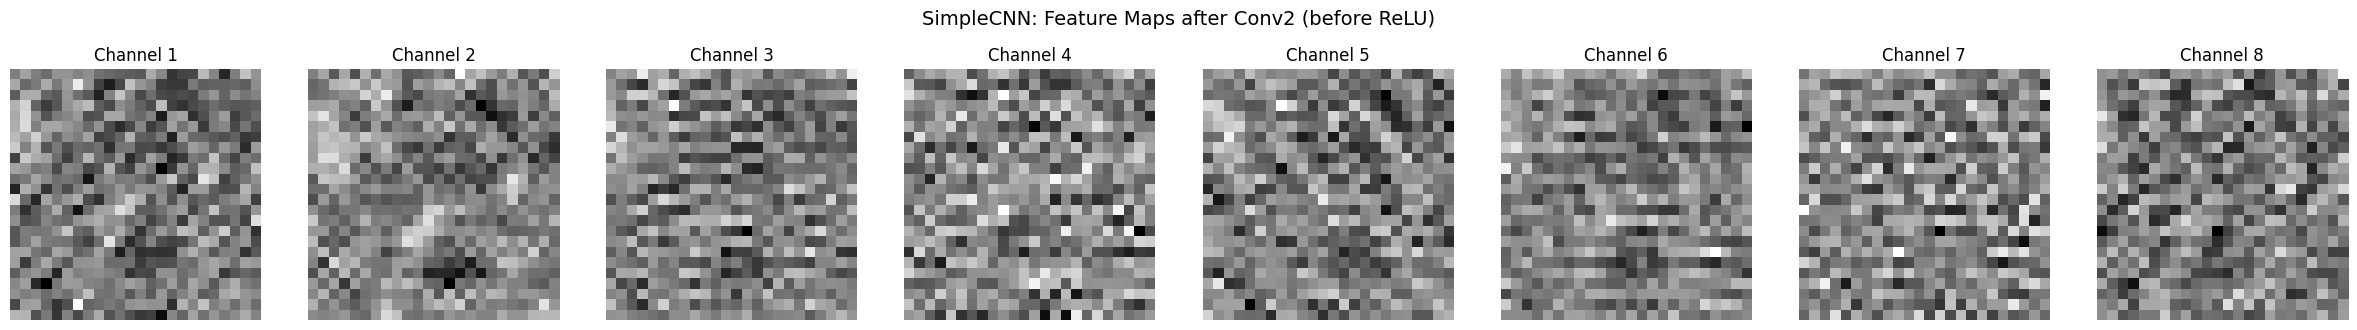

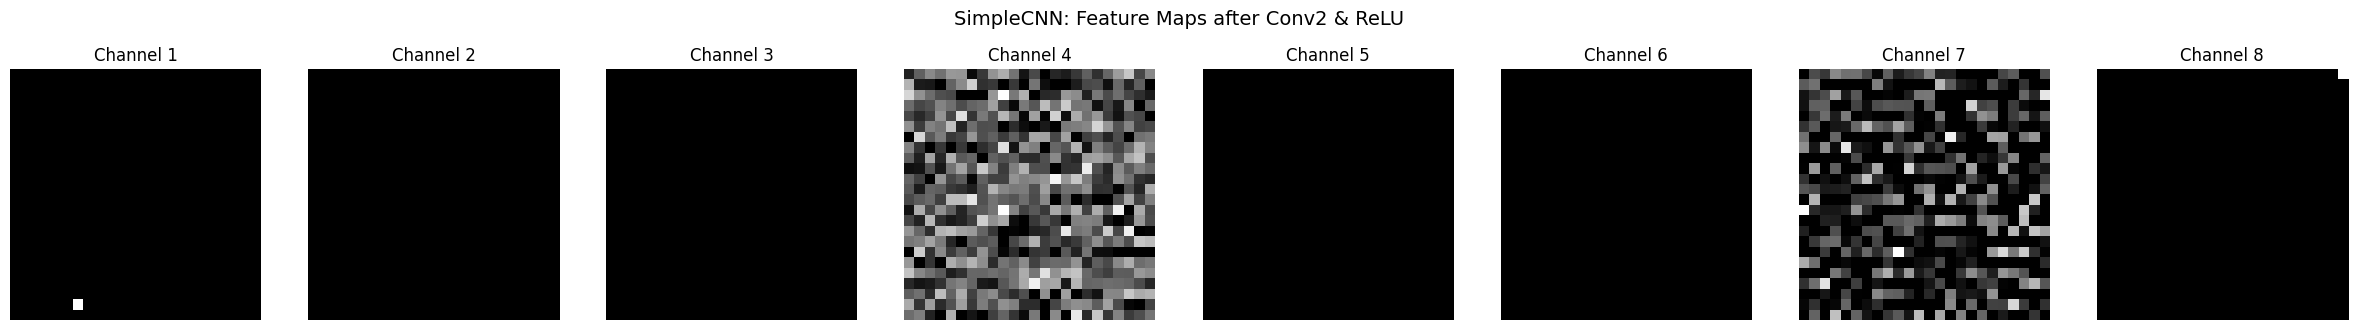

Shape of final output from SimpleCNN: torch.Size([1, 16, 24, 24])


In [3]:

# Instantiate the network
simple_model = SimpleCNN()

# Simulate input image: batch_size=1, channels=1, height=28, width=28
input_image = torch.rand((1, 1, 28, 28))
print(f"Input image shape: {input_image.shape}\n")

print("--- SimpleCNN Processing ---")

# Pass through conv1 manually to get intermediate output
out_conv1_simple = simple_model.conv1(input_image)
print(f"Shape after SimpleCNN conv1: {out_conv1_simple.shape}")
visualize_feature_maps(out_conv1_simple, num_maps_to_show=6, title="SimpleCNN: Feature Maps after Conv1")

# Apply ReLU
out_relu1_simple = nn.functional.relu(out_conv1_simple)

# Pass through conv2 manually
out_conv2_simple = simple_model.conv2(out_relu1_simple)
print(f"Shape after SimpleCNN conv2: {out_conv2_simple.shape}")
visualize_feature_maps(out_conv2_simple, num_maps_to_show=8, title="SimpleCNN: Feature Maps after Conv2 (before ReLU)")

# Apply ReLU on conv2 output
out_relu2_simple = nn.functional.relu(out_conv2_simple)
visualize_feature_maps(out_relu2_simple, num_maps_to_show=8, title="SimpleCNN: Feature Maps after Conv2 & ReLU")

# Full forward pass (for completeness)
final_output_simple = simple_model(input_image)
print(f"Shape of final output from SimpleCNN: {final_output_simple.shape}")


Step 4: Adjusting convolutional parameters

In [4]:

class TunedCNN(nn.Module):
    def __init__(self):
        super(TunedCNN, self).__init__()

        # Conv1: 1 input channel, 6 output channels
        # Kernel size = 5, stride = 2, padding = 1
        # Output size = floor((W - K + 2P)/S) + 1 = floor((28 - 5 + 2)/2) + 1 = floor(25/2)+1 = 12+1 = 13
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=2, padding=1)

        # Conv2: 6 input channels, 16 output channels
        # Kernel size = 3, stride = 1, padding = 2 (bigger padding)
        # If input is 13x13, output = floor((13 - 3 + 4)/1)+1 = 14+1 = 15
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=2)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        return x


Strp 5 — Visualizing outputs from TunedCNN


--- TunedCNN Processing ---
Shape after TunedCNN conv1 (K=5, S=2, P=1): torch.Size([1, 6, 13, 13])


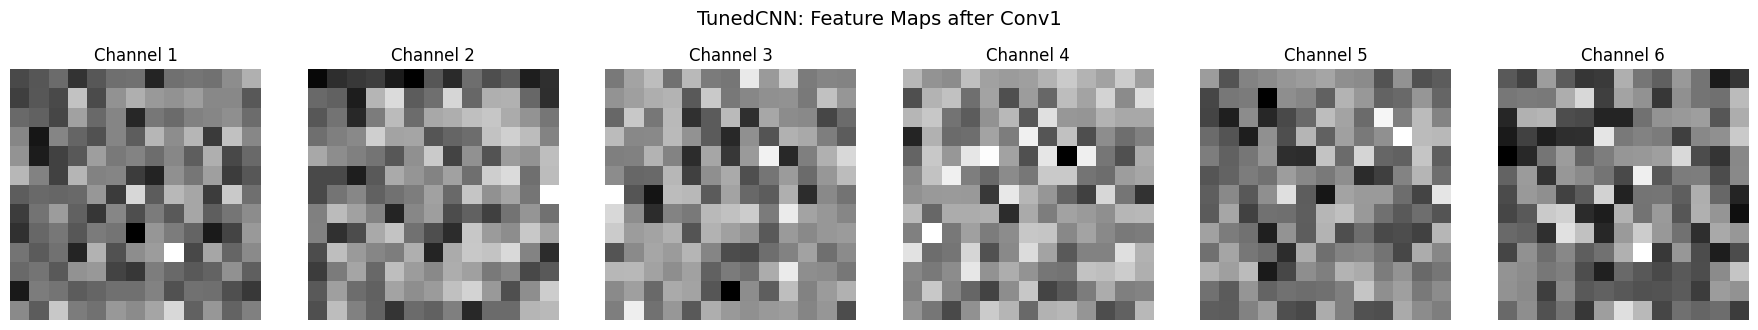

Shape after TunedCNN conv2 (K=3, S=1, P=2): torch.Size([1, 16, 15, 15])


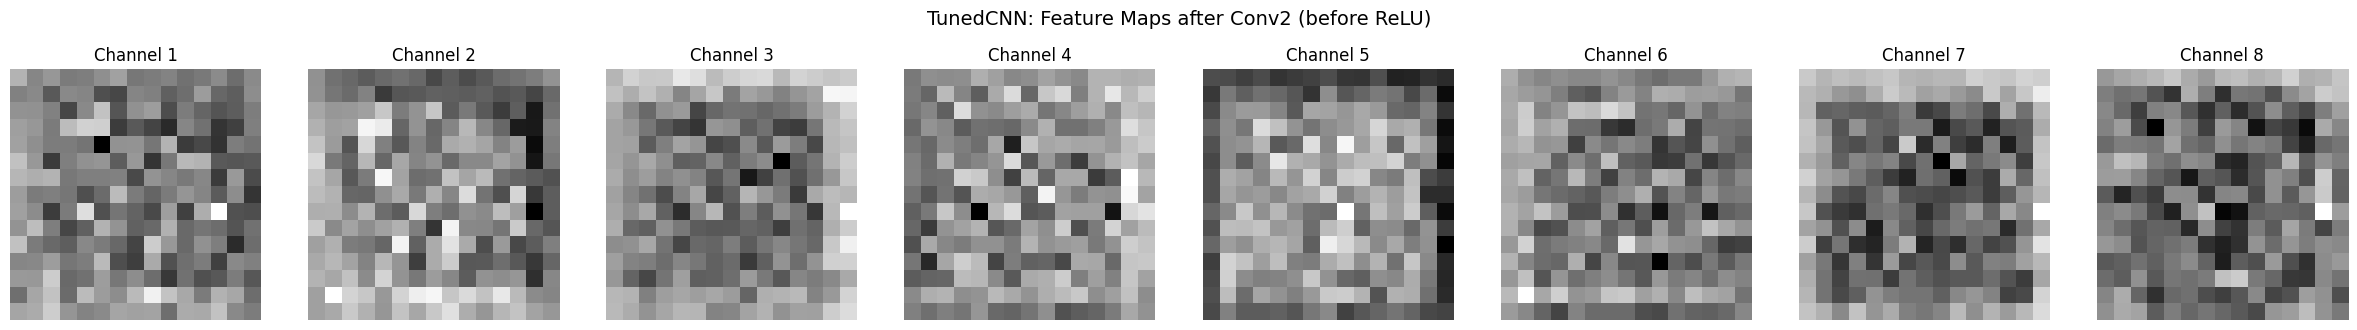

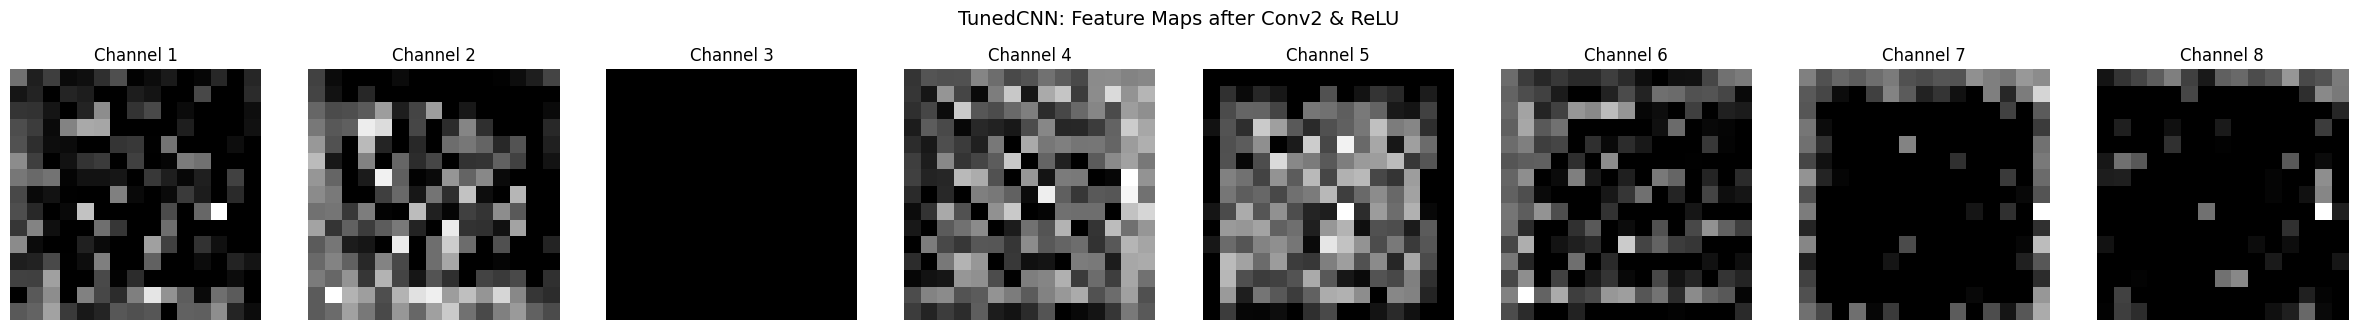

Shape of final output from TunedCNN: torch.Size([1, 16, 15, 15])


In [5]:

tuned_model = TunedCNN()

print("\n--- TunedCNN Processing ---")

# Pass through conv1 manually
out_conv1_tuned = tuned_model.conv1(input_image)
print(f"Shape after TunedCNN conv1 (K=5, S=2, P=1): {out_conv1_tuned.shape}")
visualize_feature_maps(out_conv1_tuned, num_maps_to_show=6, title="TunedCNN: Feature Maps after Conv1")

# Apply ReLU
out_relu1_tuned = nn.functional.relu(out_conv1_tuned)

# Pass through conv2 manually
out_conv2_tuned = tuned_model.conv2(out_relu1_tuned)
print(f"Shape after TunedCNN conv2 (K=3, S=1, P=2): {out_conv2_tuned.shape}")
visualize_feature_maps(out_conv2_tuned, num_maps_to_show=8, title="TunedCNN: Feature Maps after Conv2 (before ReLU)")

# Apply ReLU
out_relu2_tuned = nn.functional.relu(out_conv2_tuned)
visualize_feature_maps(out_relu2_tuned, num_maps_to_show=8, title="TunedCNN: Feature Maps after Conv2 & ReLU")

# Full forward pass (for completeness)
final_output_tuned = tuned_model(input_image)
print(f"Shape of final output from TunedCNN: {final_output_tuned.shape}")
